In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np

Hey ! 
Aujourd'hui nous allons voir ce qu'est un réseau de neuronne et comment l'implémenter avec tensorflow !

Ce code est en lien avec cet article et cette vidéo ! Alors pour avoir des explications plus détaillées je vous invite à aller voir tout ça !

In [32]:
#Un réseau de neuronne sert à faire des prédictions. Un cas particulier de prédictions est la regression.
#Le but est d'apprendre une fonction mathématique pour ensuite prédire des valeurs qui n'étaient pas dans le jeu de données initial

#Definissons une fonction affine aléatoire

#f(x) = ax+b
def affine(x, a, b):
  return a *x +b

#Testons pour x = 1 et a et b aléatoires 
a = random.randrange(0,100,1)
b = random.randrange(0,10,1)
print("f(1)=",a," X ","1 + ",b," = ",affine(1, a, b))



f(1)= 86  X  1 +  5  =  91


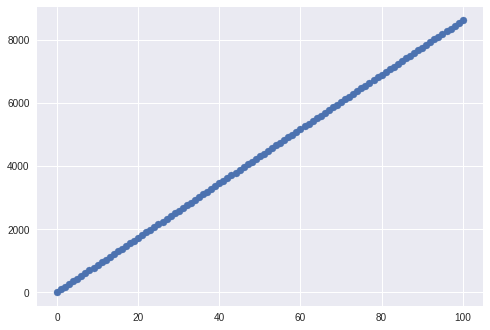

In [33]:
#Nous allons maintenant générer un jeu de données contenant f(x) pour x allant de 0 à 100

training_labels = []
training_inputs = []

for i in range(101):
  training_labels.append([affine(i,a,b)])
  training_inputs.append([i])

#affichons cela !

plt.scatter(training_inputs, training_labels)
plt.show()
training_inputs =np.asarray(training_inputs)
training_labels = np.asanyarray(training_labels)

Notre Objectif est désormais de créer un réseau de neuronne capable d'apprendre cette fonction afin de prédire la suite de la courbe !

Mais qu'est-ce qu'un neuronne ? 

Un neuronne n'est rien d'autre qu'une simple opération * a x + b* ! Où  *a*  est appelé poids (weight) et écrit w et b est appelé biais (bias).

Notre objectif et celui du réseau et d'apprendre au fur et a mesure quelles sont les valeures de w et b lui permettant de prédire les données de la manière la plus juste.


In [0]:
#définissons la structure de notre réseau en tensorflow

#Etape 1 les inputs et les labels !
#Les input sont les variables avec lesquel le réseau doit faire ses prédictions, ici x
#Les labels sont les prédictions qu'il doit produire, ici f(x)

x = tf.placeholder(tf.float32, [None,1]) #tf.placeholder est une case vide que l'on crée et qui fait comprendre à TF que l'on va lui remplir au fur et à mesure
#None est la taille du "batch", soit le nombre d'input qu'on va lui passer par itération et 1 représente la taille de la liste qu'on lui transmet. Ici 1 car il n'y a qu'un nombre: x

y = tf.placeholder(tf.float32, [None,1]) #Meme concept ici !

#nous allons maintenant définir le poids et le biais

weight = tf.Variable(0.) #tf.Variable dit a tensorflow que cette variable est la sienne, et qu'il doit l'optimiser , le tableau qui suit défini la taille de la matrice qu'est le poid. Soit ici la taille de l'entrée par la taille de sortie

bias = tf.Variable(0.) #ici le biais n'est pas une matrice mais un vecteur car nous faisons une somme: w*x +b 



#maintenant spécifions à Tensorflow ce qu'il doit faire avec ces valeurs ! 

prediction = tf.nn.leaky_relu(tf.add(tf.multiply(weight,x),bias)) #add pour une addition et matmul pour une multiplication matricielle. en plus de cela nous utilisons une fonction d'activation(relu)

#une fonction d'activation est comme un filtre que nous applicons au resultat de l'equation. ici le relu est un passe bas. C'est a dire que toutes les valeurs négatives seront transformées en 0



Nous avons maintenant notre réseau. Nous avons créé w et b. Nous avons spécifié la taille de X et de Y. 

Mais comment notre réseau va -t-il apprendre ? 

Pour cela il faut calculer son erreur. Son objectif est simple, avoir une erreur égale à 0.

Pour calculer son erreur nous allons utiliser une formule très simple qui est le "mean squared error". 

En machine learning nous appelons celà le coût (cost ou loss).

In [0]:
cost = tf.reduce_mean(tf.losses.mean_squared_error(y, prediction))

Bien. Nous avons calculé l'erreur. Il faut maintenant lui dire comment se corriger et optimiser w et b. 

Pour cela nous allons utilisé une methode d'optimisation appelée "Gradien Descent". Je vous invite à lire l'article pour plus de détails sur son fonctionnement ;) 

In [0]:
optimisation = tf.train.GradientDescentOptimizer(0.0001).minimize(cost) #ici 0.1 est le "learning rate", l'intensité des changements qu'il fera a chaque correction. On lui demande de minimiser le cout 

Maintenant que tout cela est défini nous n'avons plus qu'à l'entrainer !! 

In [37]:
with tf.Session() as sess:
  init = tf.initialize_all_variables()
  sess.run(init)#on initialise les variables
  
  for i in range(40000):
    
    _,c,w,bi = sess.run([optimisation, cost,weight, bias], feed_dict={x:training_inputs, y: training_labels}) #on lui demander d'optimiser et de nous transmettre le cout. feed_dict sert à lui dire ce qu'on met dans les placeholder
    if i% 10000 ==0:
      print("f(x)= ",w,"(",a,") * X + ",bi,"(",b,") Cost = ",c)
  print("f(x)= ",w,"(",a,") * X + ",bi,"(",b,") Cost = ",c)
  #Maintenant nous allons tester le tout en demandant à notre réseau de prédire f(x) jusqu'a x=1000
  input_test = []
  for i in range(1000):
    input_test.append([i])
  input_test = np.asarray(input_test)

  test_predictions = sess.run(prediction, feed_dict={x:input_test})

  

f(x)=  11.533999 ( 86 ) * X +  0.1722 ( 5 ) Cost =  24819624.0
f(x)=  86.033394 ( 86 ) * X +  2.7629282 ( 5 ) Cost =  1.269958
f(x)=  86.02011 ( 86 ) * X +  3.6530056 ( 5 ) Cost =  0.46046078
f(x)=  86.01211 ( 86 ) * X +  4.188883 ( 5 ) Cost =  0.1669672
f(x)=  86.00729 ( 86 ) * X +  4.511493 ( 5 ) Cost =  0.060548365


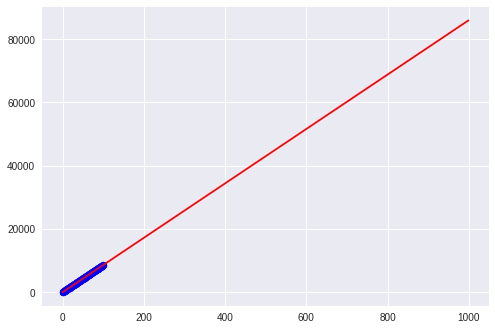

In [38]:
plt.scatter(training_inputs,training_labels, color="blue")
plt.plot(input_test, test_predictions, color="red")
plt.show()

Ca semble plutot bien ! 